<center><h1>  Customer Churn Prediction Using Artificial Neural Network (ANN)</h1></center>

# 1. Problem

Customer Churn is the rate at which a commercial (very prevalent in SaaS platforms) customer leaves the commercial business and takes their money elsewhere.

# 2. The Data

The data is sourced from Kaggle. In our dataset, we have 7043 rows (each representing a unique customer) with 21 columns: 19 features, 1 target feature (Churn). The data is composed of both numerical and categorical features, so we will need to address each of the datatypes respectively.

**Target:**
* Churn — Whether the customer churned or not (Yes, No)

**Numeric Features:**
* Tenure — Number of months the customer has been with the company
* MonthlyCharges — The monthly amount charged to the customer
* TotalCharges — The total amount charged to the customer

**Categorical Features:**
* CustomerID
* Gender — M/F
* SeniorCitizen — Whether the customer is a senior citizen or not (1, 0)
* Partner — Whether customer has a partner or not (Yes, No)
* Dependents — Whether customer has dependents or not (Yes, No)
* PhoneService — Whether the customer has a phone service or not (Yes, No)
* MulitpleLines — Whether the customer has multiple lines or not (Yes, No, No Phone Service)
* InternetService — Customer’s internet service type (DSL, Fiber Optic, None)
* OnlineSecurity — Whether the customer has Online Security add-on (Yes, No, No Internet Service)
* OnlineBackup — Whether the customer has Online Backup add-on (Yes, No, No Internet Service)
* DeviceProtection — Whether the customer has Device Protection add-on (Yes, No, No Internet Service)
* TechSupport — Whether the customer has Tech Support add-on (Yes, No, No Internet Service)
* StreamingTV — Whether the customer has streaming TV or not (Yes, No, No Internet Service)
* StreamingMovies — Whether the customer has streaming movies or not (Yes, No, No Internet Service)
* Contract — Term of the customer’s contract (Monthly, 1-Year, 2-Year)
* PaperlessBilling — Whether the customer has paperless billing or not (Yes, No)
* PaymentMethod — The customer’s payment method (E-Check, Mailed Check, Bank Transfer (Auto), Credit Card (Auto))

# 3.  Loading Data and Packages

In [64]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import seaborn as sns
import tensorflow as tf
from tensorflow import keras


%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Data Science/deep-learning-keras-tf-tutorial-master/11_chrun_prediction/customer_churn.csv")


In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# make all column names lowercase
df.columns = map(str.lower, df.columns)
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


# 3. Exploratory Data Analysis

**Let's drop customerID column as it is of no use**

In [6]:
df.drop('customerid', axis='columns', inplace=True)

**TotalCharges should be float but it is an object. Let's check what's going on with this column**

In [7]:
df.totalcharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

It's string. Lets convert it to numbers, but first let's check is there're empty rows

In [8]:
df[pd.to_numeric(df.totalcharges,errors='coerce').isnull()]

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
df.shape

(7043, 20)

In [10]:
df[df.totalcharges!=' '].shape

(7032, 20)

**Only 11 rows have empty strings. Let's remove these rows.**

In [11]:
df.drop(df[df.totalcharges ==' '].index, inplace=True)

In [12]:
df.shape

(7032, 20)

**Now we can transform**

In [13]:
df.totalcharges = pd.to_numeric(df.totalcharges)

In [14]:
df.totalcharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

## Data Visualization

###Target: Churn

In [15]:
def plot_target_dist(df):
    sns.set(style = 'whitegrid', palette= 'Set2')
    sns.set_context('paper', font_scale = 2)
    fig = plt.figure(figsize = (20, 10))
    plt.subplot(121)
    plt.pie(df.churn.value_counts(),labels = ['No Churn', 'Churn'], autopct = '%.1f%%', radius = 1, textprops={'fontsize': 20, 'fontweight': 'bold'})
    plt.title('Churn Outcome Pie Chart', fontsize = 30, fontweight = 'bold')
    plt.subplot(122)
    t = sns.countplot(df.churn)
    t.set_xlabel('Churn', fontweight = 'bold', fontsize = 20)
    t.set_ylabel('Count', fontweight = 'bold', fontsize = 20)
    plt.title('Churn Outcome Distributions', fontsize = 30, fontweight = 'bold')
    plt.tight_layout()

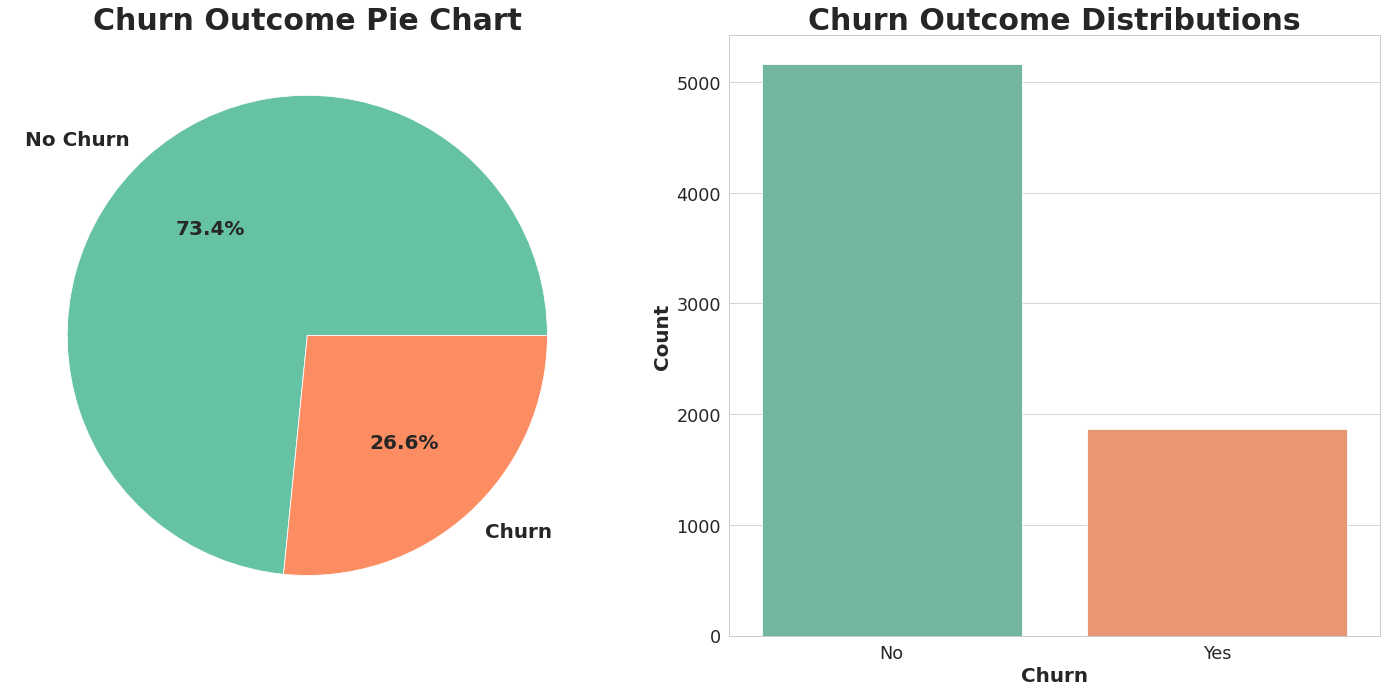

In [16]:
plot_target_dist(df)

###  Numerical Feature

In [17]:
def plot_kde(df, feature):
    plt.figure(figsize = (15, 5))
    plt.title(f"KDE Plot: {feature}", fontsize = 30, fontweight = 'bold')
    ax = sns.kdeplot(df[df.churn == 'No'][feature].dropna(), label = 'No Churn', lw = 2, legend = True)
    plt.legend = True
    ax1 = sns.kdeplot(df[df.churn == 'Yes'][feature].dropna(), label = 'Churn', lw = 2, legend = True)
    if feature == 'tenure':
        plt.xlabel('Tenure Length (Months)', fontsize = 20, fontweight = 'bold')
    else:
        plt.xlabel('Charge Amount ($)', fontsize = 20, fontweight = 'bold')
    plt.tight_layout()

**Kernel Density Estimations - Tenure, Monthly Charges, Total Charges**

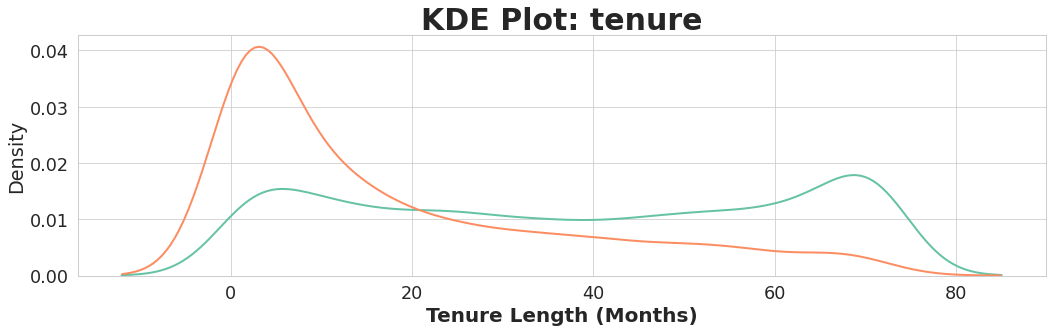

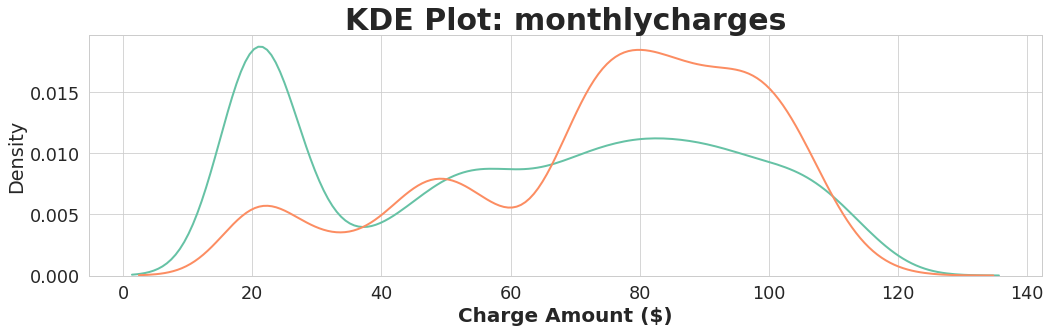

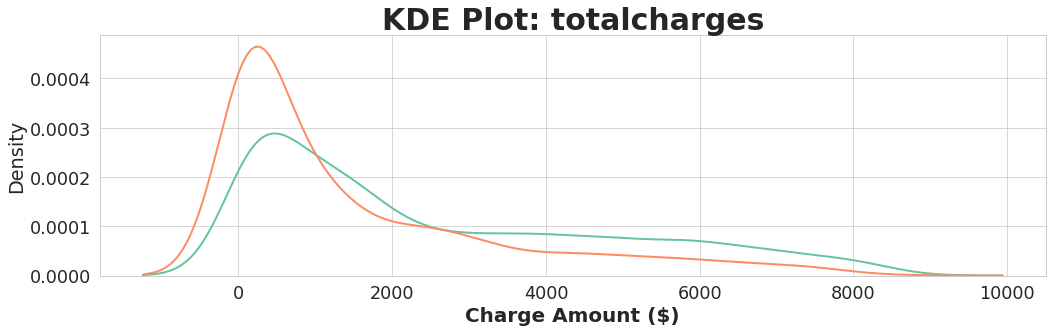

In [18]:
plot_kde(df, 'tenure')
plot_kde(df, 'monthlycharges')
plot_kde(df, 'totalcharges')

**Grouping Tenure**

In [19]:
def tenure_groups(df):
    if df.tenure <= 12:
        return "less_than_1"
    elif (df.tenure > 12) & (df.tenure <= 24):
        return "less_than_2"
    elif (df.tenure > 24) & (df.tenure <= 36):
        return "less_than_3"
    elif (df.tenure > 36) & (df.tenure <= 48):
        return "less_than_4"
    elif (df.tenure > 48) & (df.tenure <= 60):
        return "less_than_5"
    else:
        return "greater_than_5"

        

In [20]:
def tenure_group_counts(df):
    plt.figure(figsize = (15,10))
    t = sns.countplot(data = df, x = 'grouped_tenure', hue = 'churn', order = ['less_than_1', 'less_than_2', 'less_than_3', 'less_than_4', 'less_than_5', 'greater_than_5'])
    t.set_title('Churn Counts by Tenure Groups', fontsize = 30, fontweight = 'bold')
    t.set_xlabel('Tenure Groups',fontsize = 20, fontweight = 'bold', labelpad = 1.5)
    t.set_ylabel('Count', fontsize = 20, fontweight = 'bold')
    t.legend(loc = 'upper right', fontsize = 20, labels = ['No Churn', 'Churn'], edgecolor = 'black', bbox_to_anchor = (1.2, 1))
    plt.tight_layout()

In [21]:
def plot_numerical_averages(df, feature):
    fig = plt.figure(figsize = (15, 10))
    b = sns.barplot(data = df, x = 'grouped_tenure', y = feature, hue = 'churn', order = ['less_than_1', 'less_than_2', 'less_than_3', 'less_than_4', 'less_than_5', 'greater_than_5'])
    b.set_xlabel('Tenure Groups', fontweight = 'bold', fontsize = 20)
    b.set_ylabel(f'{feature} ($)', fontsize = 20, fontweight = 'bold')
    b.set_title(f'Average {feature} by Tenure Group', fontsize = 30, fontweight = 'bold')
    b.legend(fontsize = 20, loc = 'upper left', edgecolor = 'black')
    plt.tight_layout()

In [22]:
df['grouped_tenure'] = df.apply(lambda df: tenure_groups(df), axis = 1)

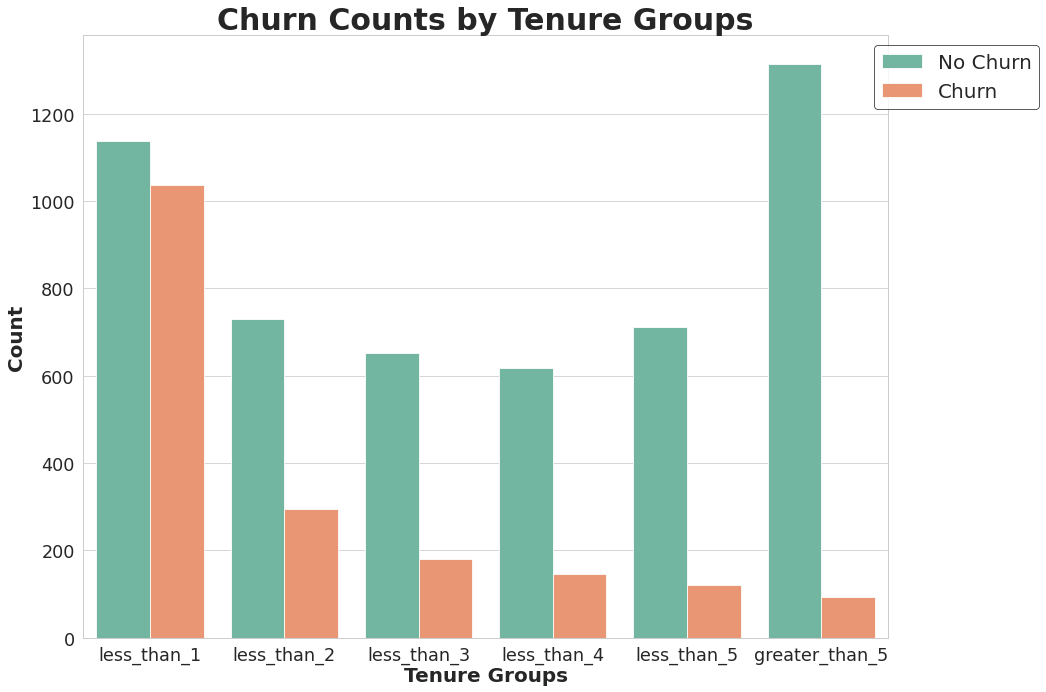

In [23]:
tenure_group_counts(df)

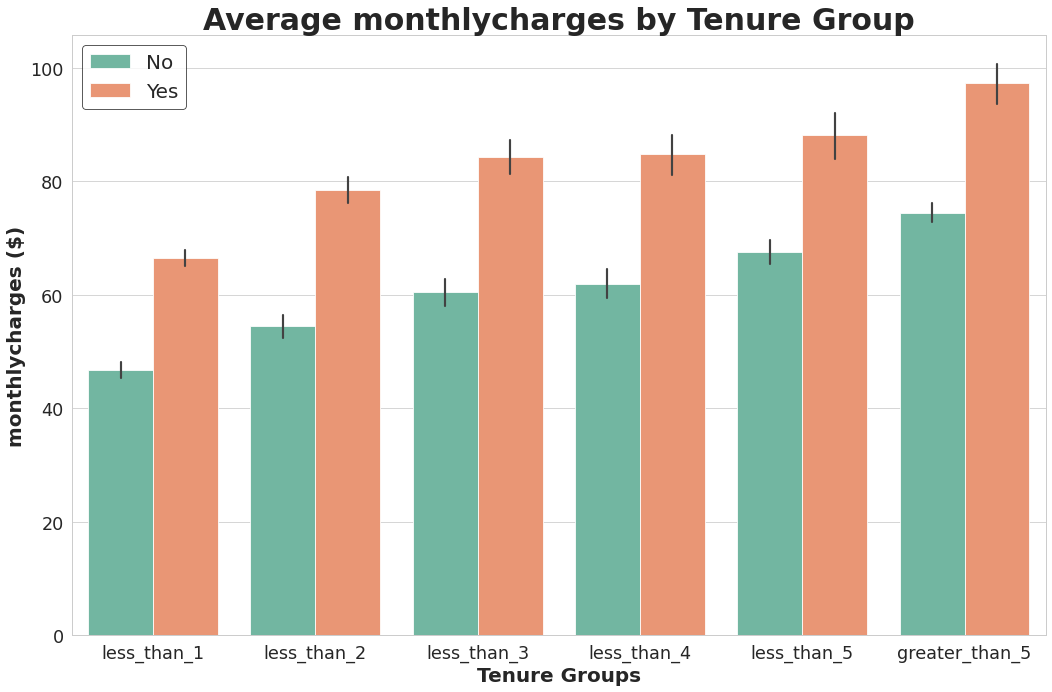

In [24]:
plot_numerical_averages(df, 'monthlycharges')

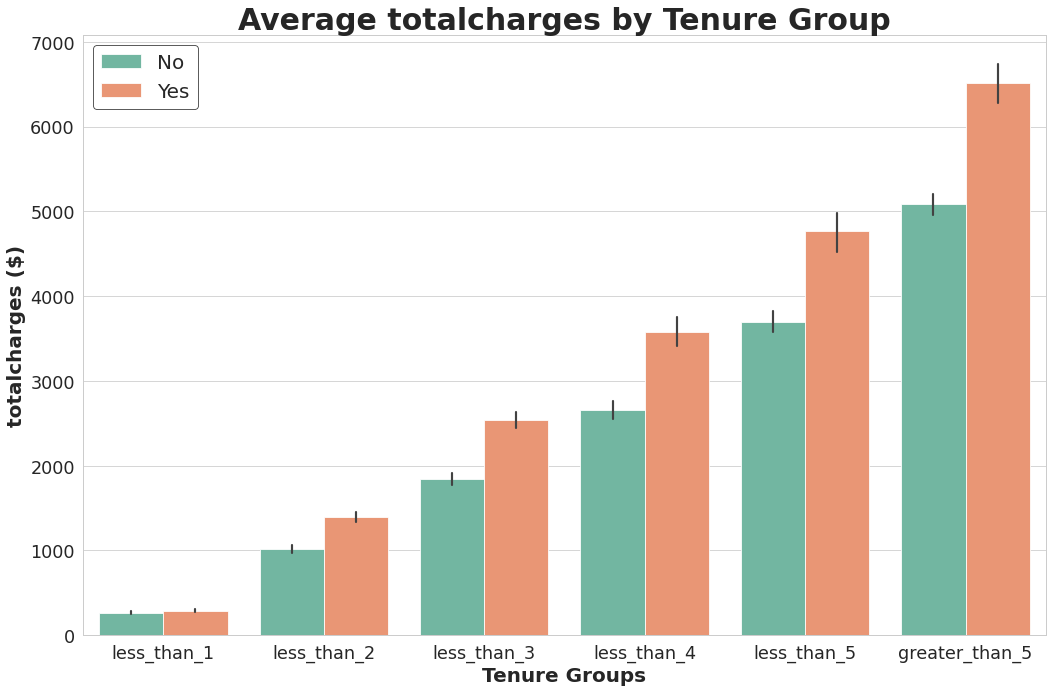

In [25]:
plot_numerical_averages(df, 'totalcharges')

**Numeric Variable Conclusions:**

* Tenure: New clients  (lower service tenures) have a higher probability of churning than those with long tenures.
* Monthly Charges: Generally speaking, a customer churning increases as charges increase, and customers have the highest probability of churning when their monthly charges exceed 60 dollars. Customers who do not churn are most likely to have bills around 20 dollars, followed by just over 80 dollars.
* Total Charges: Distributions mostly too general for impact of feature (Monthly is most likely more important)

### Categorical Features

In [26]:
def plot_gender_dist(df):
    sns.set(style = 'whitegrid', palette= 'Set2')
    sns.set_context('paper', font_scale = 2)
    fig = plt.figure(figsize = (30,10))
    
    plt.subplot(131)
    plt.pie(df.gender.value_counts(), labels = ['Male', 'Female'], autopct = '%.1f%%', radius = 1, textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Overall Data Gender Composition', fontweight = 'bold', fontsize = 30)
    
    plt.subplot(132)
    a = sns.countplot(data = df, x = 'gender', hue = 'churn')
    a.set_title('Gender Distribution by Churn', fontsize = 30, fontweight = 'bold')
    a.set_xlabel('Gender', fontweight = 'bold', fontsize = 20)
    a.set_ylabel('Count', fontweight = 'bold', fontsize = 20)
    
    plt.subplot(133)
    x = sns.violinplot('gender', 'monthlycharges', 'churn', df, split = True)
    x.set_title('Violin Plot: Monthly Charges by Gender', fontsize = 30, fontweight = 'bold')
    x.set_xlabel('Gender', fontsize = 20, fontweight = 'bold')
    x.set_ylabel('Monthly Charges ($)', fontweight = 'bold', fontsize = 20)
    
    plt.tight_layout()
    
    
def plot_age_dist(df):
    
    fig = plt.figure(figsize = (30,10))
    
    plt.subplot(131)
    plt.pie(df.seniorcitizen.value_counts(), labels = ['Non-Senior Citizen', 'Senior'], autopct = '%.1f%%', radius = 1, textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Age Composition of Overall Data', fontweight = 'bold', fontsize = 30)
    
    plt.subplot(132)
    g = df.copy()
    g = g.groupby('seniorcitizen')['churn'].value_counts().to_frame()
    g = g.rename({'churn':'pct_total'}, axis = 1).reset_index()
    g['pct_total'] = (g['pct_total']/len(df)) * 100
    t = sns.barplot('seniorcitizen', y = 'pct_total', hue = 'churn', data = g)
    t.set_title('Churn % by Age', fontsize = 30, fontweight = 'bold')
    t.set_xlabel('')
    t.set_ylabel('Percentage of Customers', fontsize = 20, fontweight = 'bold')
    t.set_xticklabels(labels = ['Non-Senior Citizen', 'Senior Citizen'], fontweight = 'bold', fontsize = 20)
    
    plt.subplot(133)
    x = sns.violinplot('seniorcitizen', 'monthlycharges', 'churn', df, split = True)
    x.set_title('Violin Plot: Monthly Charges by Age', fontsize = 30, fontweight = 'bold')
    x.set_xlabel('')
    x.set_ylabel('Monthly Charges ($)', fontsize = 20, fontweight = 'bold')
    x.set_xticklabels(labels = ['Non-Senior Citizen', 'Senior Citizen'], fontsize = 20, fontweight = 'bold')
    
    plt.tight_layout()
    
def plot_partner_dependents(df):
    
    fig = plt.figure(figsize = (25,25))
    x = df.copy()
    plt.subplot(321)
    plt.pie(df.partner.value_counts(), labels = ['No Partner', 'Partner'], autopct = '%.1f%%', radius = 1, textprops = {'fontsize':20, 'fontweight':'bold'}, startangle = 90)
    plt.title('Partner Composition of Overall Data', fontweight = 'bold', fontsize = 30)
    
    plt.subplot(322)
    plt.pie(df.dependents.value_counts(), labels = ['No Dependents', 'Dependents'], autopct = '%.1f%%', radius = 1,  textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Dependent Composition of Overall Data', fontsize = 30, fontweight = 'bold')
    
    plt.subplot(323)
    x = df.copy()
    x = x.groupby('partner')['churn'].value_counts().to_frame()
    x = x.rename({'churn':'pct_total'}, axis = 1).reset_index()
    x['pct_total'] = (x['pct_total']/len(df)) * 100
    u = sns.barplot('partner', y = 'pct_total', hue = 'churn', data = x)
    u.set_title('Churn % by Partner', fontweight = 'bold', fontsize = 30)
    u.set(xticklabels = ['No Partner', 'Partner'])
    u.set_xlabel('')
    u.set_ylabel('Percentage of Total', fontweight = 'bold', fontsize = 20)
    
    plt.subplot(324)
    y = df.copy()
    y = y.groupby('dependents')['churn'].value_counts().to_frame()
    y = y.rename({'churn':'pct_total'}, axis = 1).reset_index()
    y['pct_total'] = (y['pct_total']/len(df)) * 100
    v = sns.barplot('dependents', y = 'pct_total', hue = 'churn', data = y)
    v.set_title('Churn % by Dependents', fontweight = 'bold', fontsize = 30)
    v.set(xticklabels = ['No Dependents', 'Dependents'])
    v.set_xlabel('')
    v.set_ylabel('')
    
    plt.subplot(325)
    y = sns.violinplot('partner', 'monthlycharges', 'churn', df, split = True)
    y.set_title('Violin Plot: Monthly Charges by Partner', fontweight = 'bold', fontsize = 30)
    y.set_xticklabels(['Partner', 'No Partner'])
    y.set_xlabel('')
    
    plt.subplot(326)
    z = sns.violinplot('dependents', 'monthlycharges', 'churn', df, split = True)
    z.set_title('Violin Plot: Monthly Charges by Dependents', fontweight = 'bold', fontsize = 30)
    z.set_xticklabels(['No Dependents', 'Dependents'])
    z.set_xlabel('')
    z.set_ylabel('Monthly Charges', fontweight = 'bold', fontsize = 20)

def plot_services(df):
    
    phone_only = df[(df.phoneservice == 'Yes') & (df.internetservice == 'No')]
    
    fig = plt.figure(figsize = (30, 15))

    plt.subplot(231)
    plt.pie(phone_only.churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', radius = 1, textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customer Churn - Phone Service Only', fontsize = 20, fontweight = 'bold')
    
    plt.subplot(232)
    z = df.copy()
    z = z.groupby('phoneservice')['churn'].value_counts().to_frame()
    z = z.rename({'churn':'pct_total'}, axis = 1).reset_index()
    z['pct_total'] = (z['pct_total']/len(df)) * 100
    a = sns.barplot('phoneservice', y = 'pct_total', hue = 'churn', data = z)
    a.set_title('% Churn by Phone Service', fontsize = 20, fontweight = 'bold')
    a.set(xticklabels = ['No Phone', 'Phone'])
    a.set_xlabel('')
    a.set_ylabel('% of Customers', fontweight = 'bold')
    
    
    plt.subplot(233)
    v1 = sns.violinplot('phoneservice', 'monthlycharges', 'churn', df, split = True)
    v1.set_title('Violin Plot: Monthly Charges by Phone Service', fontsize = 20, fontweight = 'bold')
    v1.set_xlabel('')
    v1.set_ylabel('Monthly Charges ($)', fontsize = 20, fontweight = 'bold')
    v1.set(xticklabels = ['No Phone', 'Phone'])
    
    plt.subplot(234)
    plt.pie(df.multiplelines.value_counts(), labels = ['Singular Line', 'Multiple Lines', 'No Phone Service'], autopct = '%.1f%%', radius = 1, textprops = {'fontweight':'bold', 'fontsize': 20}, startangle = 180)
    plt.title('Customer Churn - Qty. of Lines', fontsize = 20, fontweight = 'bold')
    

    
    plt.subplot(235)
    bb = df.copy()
    bb = bb.groupby('multiplelines')['churn'].value_counts().to_frame()
    bb = bb.rename({'churn':'pct_total'}, axis = 1).reset_index()
    bb['pct_total'] = (bb['pct_total']/len(df)) * 100
    c = sns.barplot('multiplelines', y = 'pct_total', hue = 'churn', data = bb)
    c.set(xticklabels = ['Singular Line', 'No Phone Service', 'Multiple Lines'])
    c.set_title('')
    c.set_xlabel('')
    c.set_ylabel('% of Customers', fontweight = 'bold', fontsize = 20)
    c.set_title('% Churn by Phone Line Qty.', fontsize = 30, fontweight = 'bold')
    
    plt.subplot(236)
    v = sns.violinplot('multiplelines', 'monthlycharges', 'churn', df, split = True)
    v.set_title('Violin Plot: Monthly Charges by Line Quantity', fontweight = 'bold', fontsize = 20)
    v.set_xlabel('')
    v.set_ylabel('Monthly Charges ($)', fontweight = 'bold')
    v.set(xticklabels = ['No Phone Service', 'Singular Line', 'Multiple Lines'])
    
    fig.suptitle('Phone Services -  Line Quantity', fontweight = 'bold', fontsize = 20)
    
def plot_internet_services(df):
    
    copy = df.copy()
    fig = plt.figure(figsize = (30, 10))

    plt.subplot(131)
    plt.pie(copy.internetservice.value_counts(), labels = ['Fiber Optic', 'DSL', 'No Internet'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight': 'bold'}, startangle = 180)
    plt.title('Internet Service Composition of Customers', fontweight = 'bold', fontsize = 30)
    
    plt.subplot(132)
    copy = copy.groupby('internetservice')['churn'].value_counts().to_frame()
    copy = copy.rename({'churn':'pct_total'}, axis = 1).reset_index()
    copy['pct_total'] = (copy['pct_total']/len(df)) * 100
    d = sns.barplot('internetservice', y = 'pct_total', hue = 'churn', data = copy)
    d.set_title('% Churn by Internet Service', fontweight= 'bold', fontsize = 30)
    d.set_xlabel('')
    d.set_ylabel('% of Customers', fontweight = 'bold', fontsize = 20)
    d.set(xticklabels = ['DSL', 'Fiber Optic', 'No Internet Service'])
    
    plt.subplot(133)
    e = sns.violinplot('internetservice', 'monthlycharges', 'churn', df, split = True)
    e.set_title('Violin Plot: Monthly Charges by Internet Service', fontweight = 'bold', fontsize = 30)
    e.set_xlabel('')
    e.set(xticklabels = ['DSL', 'Fiber Optic', 'No Internet Service'])
    e.set_ylabel('Monthly Charges($)', fontweight = 'bold', fontsize = 30)

    fig.tight_layout()
    

def plot_add_on_services(df):
    copy = df[df.internetservice != 'No']
    
    fig = plt.figure(figsize = (40, 15))
    
    plt.subplot(261)
    plt.pie(copy.onlinesecurity.value_counts(), labels = ['Yes', 'No'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customers w/ Online Security', fontweight = 'bold', fontsize = 25)
    
    plt.subplot(262)
    plt.pie(copy.onlinebackup.value_counts(), labels = ['Yes', 'No'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customers w/ Online Backup', fontweight = 'bold', fontsize = 25)
    
    plt.subplot(263)
    plt.pie(copy.deviceprotection.value_counts(), labels = ['Yes', 'No'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customers w/ Device Protection', fontweight = 'bold', fontsize = 25)
    
    plt.subplot(264)
    plt.pie(copy.techsupport.value_counts(), labels = ['Yes', 'No'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customers w/ Tech Support', fontweight = 'bold', fontsize = 25)
    
    plt.subplot(265)
    plt.pie(copy.streamingtv.value_counts(), labels = ['Yes', 'No'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customers w/ Streaming TV', fontweight = 'bold', fontsize = 25)
    
    plt.subplot(266)
    plt.pie(copy.streamingmovies.value_counts(), labels = ['Yes', 'No'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customers w/ Movie Streaming', fontweight = 'bold', fontsize = 25)
    
    plt.subplot(267)
    copy1 = copy[copy.onlinesecurity == 'Yes']
    plt.pie(copy1.churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Online Security - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.subplot(268)
    copy2 = copy[copy.onlinebackup == 'Yes']
    plt.pie(copy2.churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Online Backup - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.subplot(269)
    copy3 = copy[copy.deviceprotection == 'Yes']
    plt.pie(copy3.churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Device Protection - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.subplot(2,6,10)
    copy4 = copy[copy.techsupport == 'Yes']
    plt.pie(copy4.churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Tech Support - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.subplot(2,6,11)
    copy5 = copy[copy.streamingtv == 'Yes']
    plt.pie(copy5.churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Streaming TV - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.subplot(2,6,12)
    copy6 = copy[copy.streamingmovies == 'Yes']
    plt.pie(copy6.churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Streaming Movies - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.tight_layout()
    
    
def plot_service_charges(df):
    
    fig, axes = plt.subplots(nrows = 1, ncols = 6, figsize = (40, 10), sharex = True, sharey = True)
    
    copy1 = df[df.onlinesecurity != 'No internet service']
    a = sns.violinplot('onlinesecurity', 'monthlycharges', 'churn', copy1, split = True, ax = axes[0])
    a.set_title('Online Security', fontsize = 30, fontweight = 'bold')
    a.set_xlabel('Has Service', fontweight = 'bold', fontsize = 20)
    a.set_ylabel('Monthly Charges ($)', fontweight = 'bold', fontsize = 20)
    a.set_yticklabels(a.get_yticks(), size = 25, weight = 'bold')
    a.legend(loc = 'upper left', )
    a.legend_.set_title('Churn', prop = {'size': 20, 'weight':'bold'})

    copy2 = df[df.onlinebackup != 'No internet service']
    b = sns.violinplot('onlinebackup', 'monthlycharges', 'churn', copy2, split = True, ax = axes[1])
    b.set_title('Online Backup', fontweight = 'bold', fontsize = 30)
    b.set_xlabel('Has Service', fontweight = 'bold', fontsize = 20)
    b.set_ylabel('')
    b.legend_.remove()
    
    copy3 = df[df.deviceprotection != 'No internet service']
    c = sns.violinplot('onlinebackup', 'monthlycharges', 'churn', copy3, split = True, ax = axes[2])
    c.set_title('Device Protection', fontweight = 'bold', fontsize = 30)
    c.set_xlabel('Has Service', fontweight = 'bold', fontsize = 20)
    c.set_ylabel('')
    c.legend_.remove()
    
    copy4 = df[df.techsupport != 'No internet service']
    d = sns.violinplot('techsupport', 'monthlycharges', 'churn', copy3, split = True, ax = axes[3])
    d.set_title('Tech Support', fontsize = 30, fontweight = 'bold')
    d.set_xlabel('Has Service', fontsize = 20, fontweight = 'bold')
    d.set_ylabel('')
    d.legend_.remove()
    
    copy5 = df[df.streamingtv != 'No internet service']
    e = sns.violinplot('streamingtv', 'monthlycharges', 'churn', copy4, split = True, ax = axes[4])
    e.set_title('Streaming TV', fontsize = 30, fontweight = 'bold')
    e.set_xlabel('Has Service', fontweight = 'bold', fontsize = 20)
    e.set_ylabel('')
    e.legend_.remove()
    
    copy5 = df[df.streamingmovies != 'No internet service']
    f = sns.violinplot('streamingmovies', 'monthlycharges', 'churn', copy5, split = True, ax = axes[5])
    f.set_title('Streaming Movies', fontweight = 'bold', fontsize = 30)
    f.set_xlabel('Has Service', fontsize = 20, fontweight = 'bold')
    f.set_ylabel('')
    f.legend(loc = 'upper left')
    f.legend_.set_title('Churn', prop = {'size': 20, 'weight':'bold'})
    
    
def plot_contracts(df):
    
    copy = df.copy()
    
    plt.figure(figsize = (30, 10))
    
    plt.subplot(131)
    plt.pie(copy.contract.value_counts(), labels = ['Monthly', '1-Year', '2-Year'], autopct = '%.1f%%', textprops = {'fontweight':'bold', 'fontsize': 20})
    plt.title('Customer Contract Composition', fontweight = 'bold', fontsize = 30)
    
    plt.subplot(132)
    plt.title('Churn % by Contract Type', fontsize = 30, fontweight = 'bold')
    copy = copy.groupby('contract')['churn'].value_counts().to_frame()
    copy = copy.rename({'churn':'pct_total'}, axis = 1).reset_index()
    copy['pct_total'] = (copy['pct_total']/len(df)) * 100
    a = sns.barplot('contract', y = 'pct_total', hue = 'churn', data = copy)
    a.set_title('% Churn - Contract Type', fontsize = 30, fontweight = 'bold')
    a.set(xticklabels = ['Monthly', '1-Year', '2-Year'])
    a.set_xlabel('')
    a.set_ylabel('% of Customers', fontweight = 'bold')
    
    plt.subplot(133)
    b = sns.violinplot('contract', 'monthlycharges', 'churn', df, split = True)
    b.set_title('Violin Plot: Monthly Charge - Contract Types', fontweight = 'bold', fontsize = 30)
    b.set_xlabel('')
    b.set_ylabel('Monthly Charges ($)', fontweight = 'bold', fontsize = 20)
    b.set(xticklabels = ['Monthly', '1-Year', '2-Year'])
    b.legend(loc = 'upper left')
    b.legend_.set_title('Churn', prop = {'weight':'bold', 'size':20})
    
def plot_paperless(df):
    
    copy = df.copy()
    
    plt.figure(figsize = (30, 10))
    
    plt.subplot(131)
    plt.pie(copy.paperlessbilling.value_counts(), labels = ['Paperless', 'Not Paperless'], autopct = '%.1f%%', textprops = {'fontweight':'bold', 'fontsize': 20})
    plt.title('Customer Paperless Billing Composition', fontweight = 'bold', fontsize = 30)
    
    plt.subplot(132)
    plt.title('Churn % by Billing Type', fontsize = 30, fontweight = 'bold')
    copy = copy.groupby('paperlessbilling')['churn'].value_counts().to_frame()
    copy = copy.rename({'churn':'pct_total'}, axis = 1).reset_index()
    copy['pct_total'] = (copy['pct_total']/len(df)) * 100
    a = sns.barplot('paperlessbilling', y = 'pct_total', hue = 'churn', data = copy)
    a.set_title('% Churn - Paperless Billing', fontsize = 30, fontweight = 'bold')
    a.set(xticklabels = ['Paperless', 'Not Paperless'])
    a.set_xlabel('')
    a.set_ylabel('% of Customers', fontweight = 'bold')
    
    plt.subplot(133)
    b = sns.violinplot('paperlessbilling', 'monthlycharges', 'churn', df, split = True)
    b.set_title('Violin Plot: Monthly Charge - Contract Types', fontweight = 'bold', fontsize = 30)
    b.set_xlabel('')
    b.set_ylabel('Monthly Charges ($)', fontweight = 'bold', fontsize = 20)
    b.set(xticklabels = ['Paperless', 'Not Paperless'])
    b.legend(loc = 'upper right')
    b.legend_.set_title('Churn', prop = {'weight':'bold', 'size':20})
    
    plt.tight_layout()
    
    
def plot_pay_methods(df):
    
    copy = df.copy()
    
    plt.figure(figsize = (30, 10))
    
    plt.subplot(131)
    plt.pie(copy.paymentmethod.value_counts(), labels = ['E-Check', 'Mail Check' , 'Bank Transfer (Auto)', 'Credit Card (Auto)'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'}, startangle = -90)
    plt.title('Customer Payment Method Composition', fontsize = 30, fontweight = 'bold')
    
    plt.subplot(132)
    copy = copy.groupby('paymentmethod')['churn'].value_counts().to_frame()
    copy = copy.rename({'churn':'pct_total'}, axis = 1).reset_index()
    copy['pct_total'] = (copy['pct_total']/len(df))*100
    a = sns.barplot('paymentmethod', 'pct_total', 'churn', data = copy)
    a.set_title('% Churn - Payment Methods', fontsize = 30, fontweight = 'bold')
    a.set_xlabel('')
    a.set_ylabel('% of Customers', fontsize = 20, fontweight = 'bold')
    a.set_xticklabels(a.get_xticklabels(), rotation = 45)
    
    plt.subplot(133)
    c = sns.violinplot('paymentmethod', 'monthlycharges', 'churn', df, split = True)
    c.set_title('Violin Plot: Monthly Charge - Payment Methods', fontsize = 30, fontweight = 'bold')
    c.set_xlabel('')
    c.set_ylabel('Monthly Charges ($)', fontweight = 'bold', fontsize = 30)
    c.set_xticklabels(a.get_xticklabels(), rotation = 45)
    
    plt.tight_layout()

**Gender**

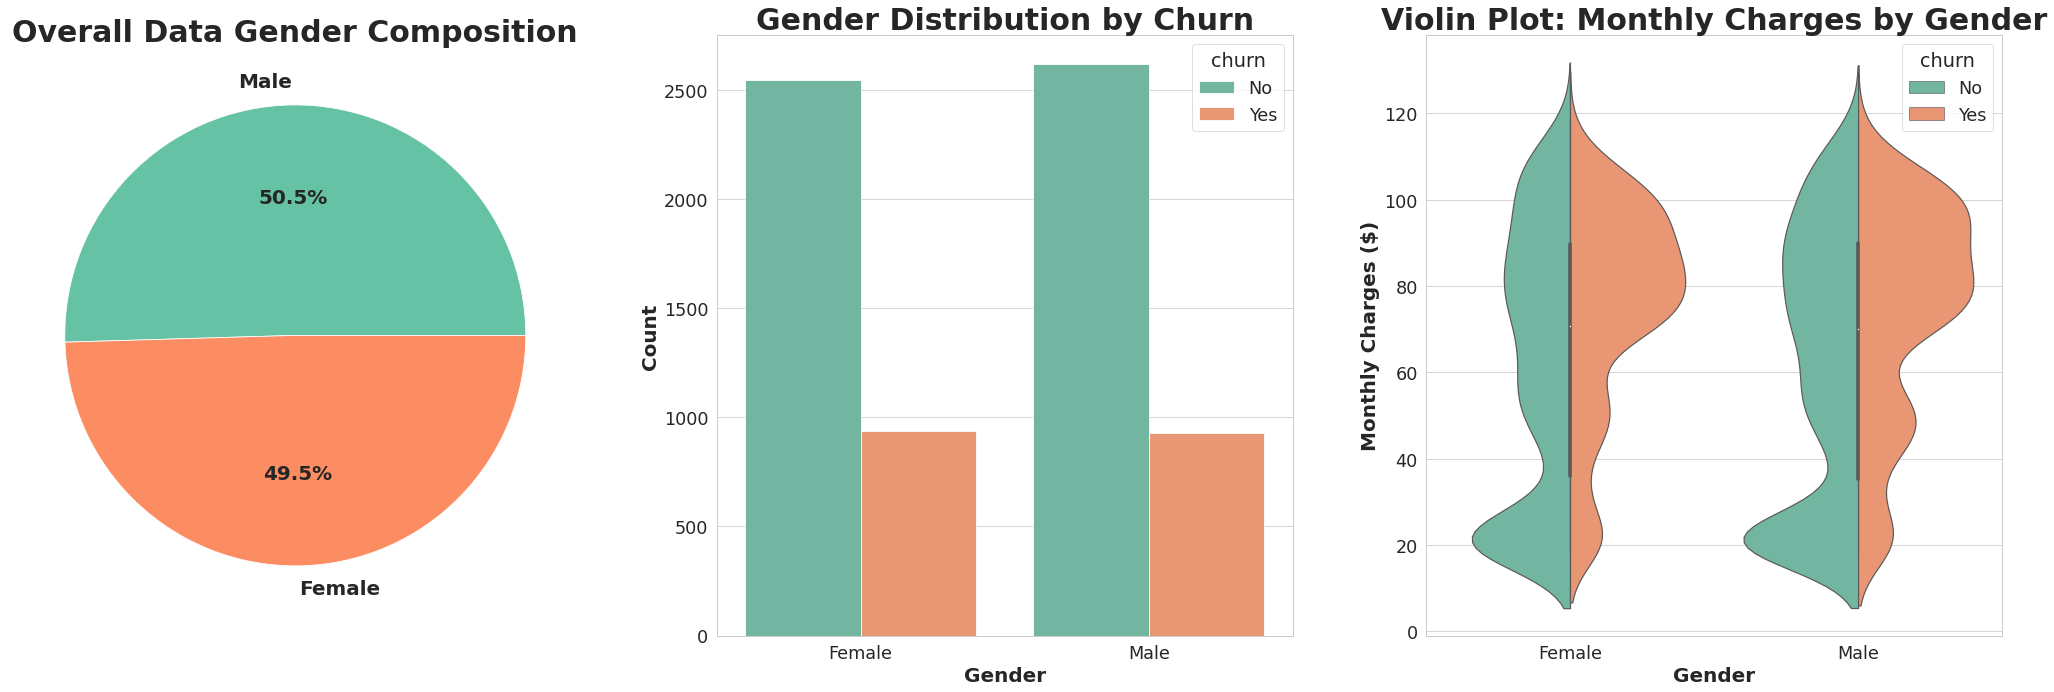

In [27]:
plot_gender_dist(df)

Gender Conclusion: Gender is equivalent in representation in our dataset and does not appear to be an indicator of Churn

**Age**

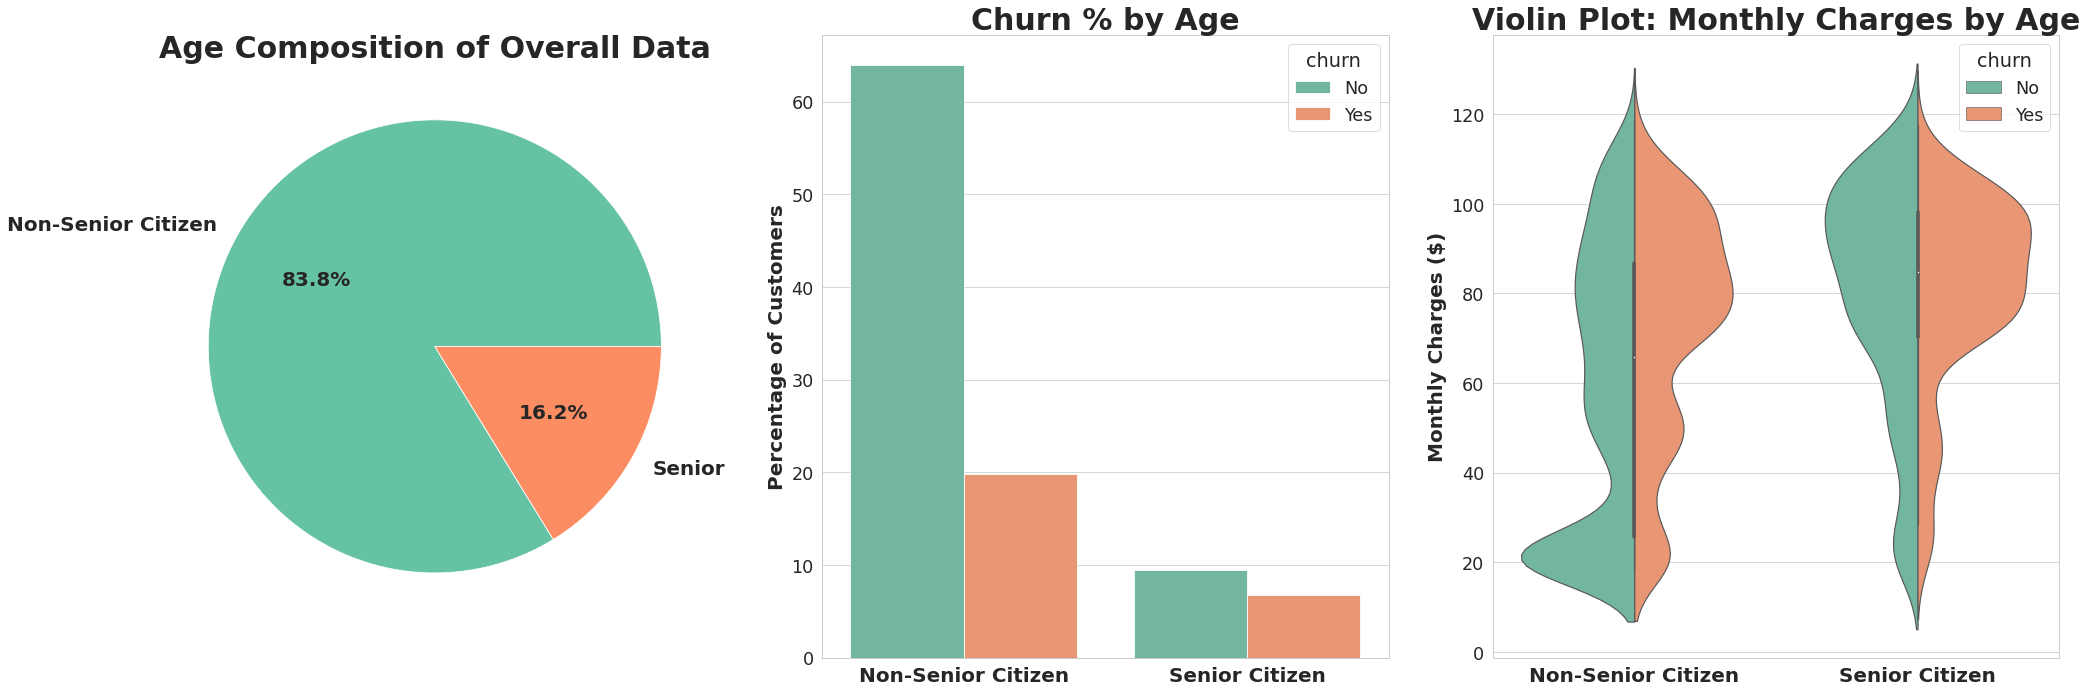

In [28]:
plot_age_dist(df)

**Age Conclusion:**

* Our dataset has significantly less senior citizens than non-seniors (only 16% are senior)
* Overall, more non-senior citizens churn than senior citizens
* A higher proportion of senior citizens churn than non-senior citizens

**Partner & Dependents**

In [29]:
df[df.churn == 'Yes'].partner.value_counts()

No     1200
Yes     669
Name: partner, dtype: int64

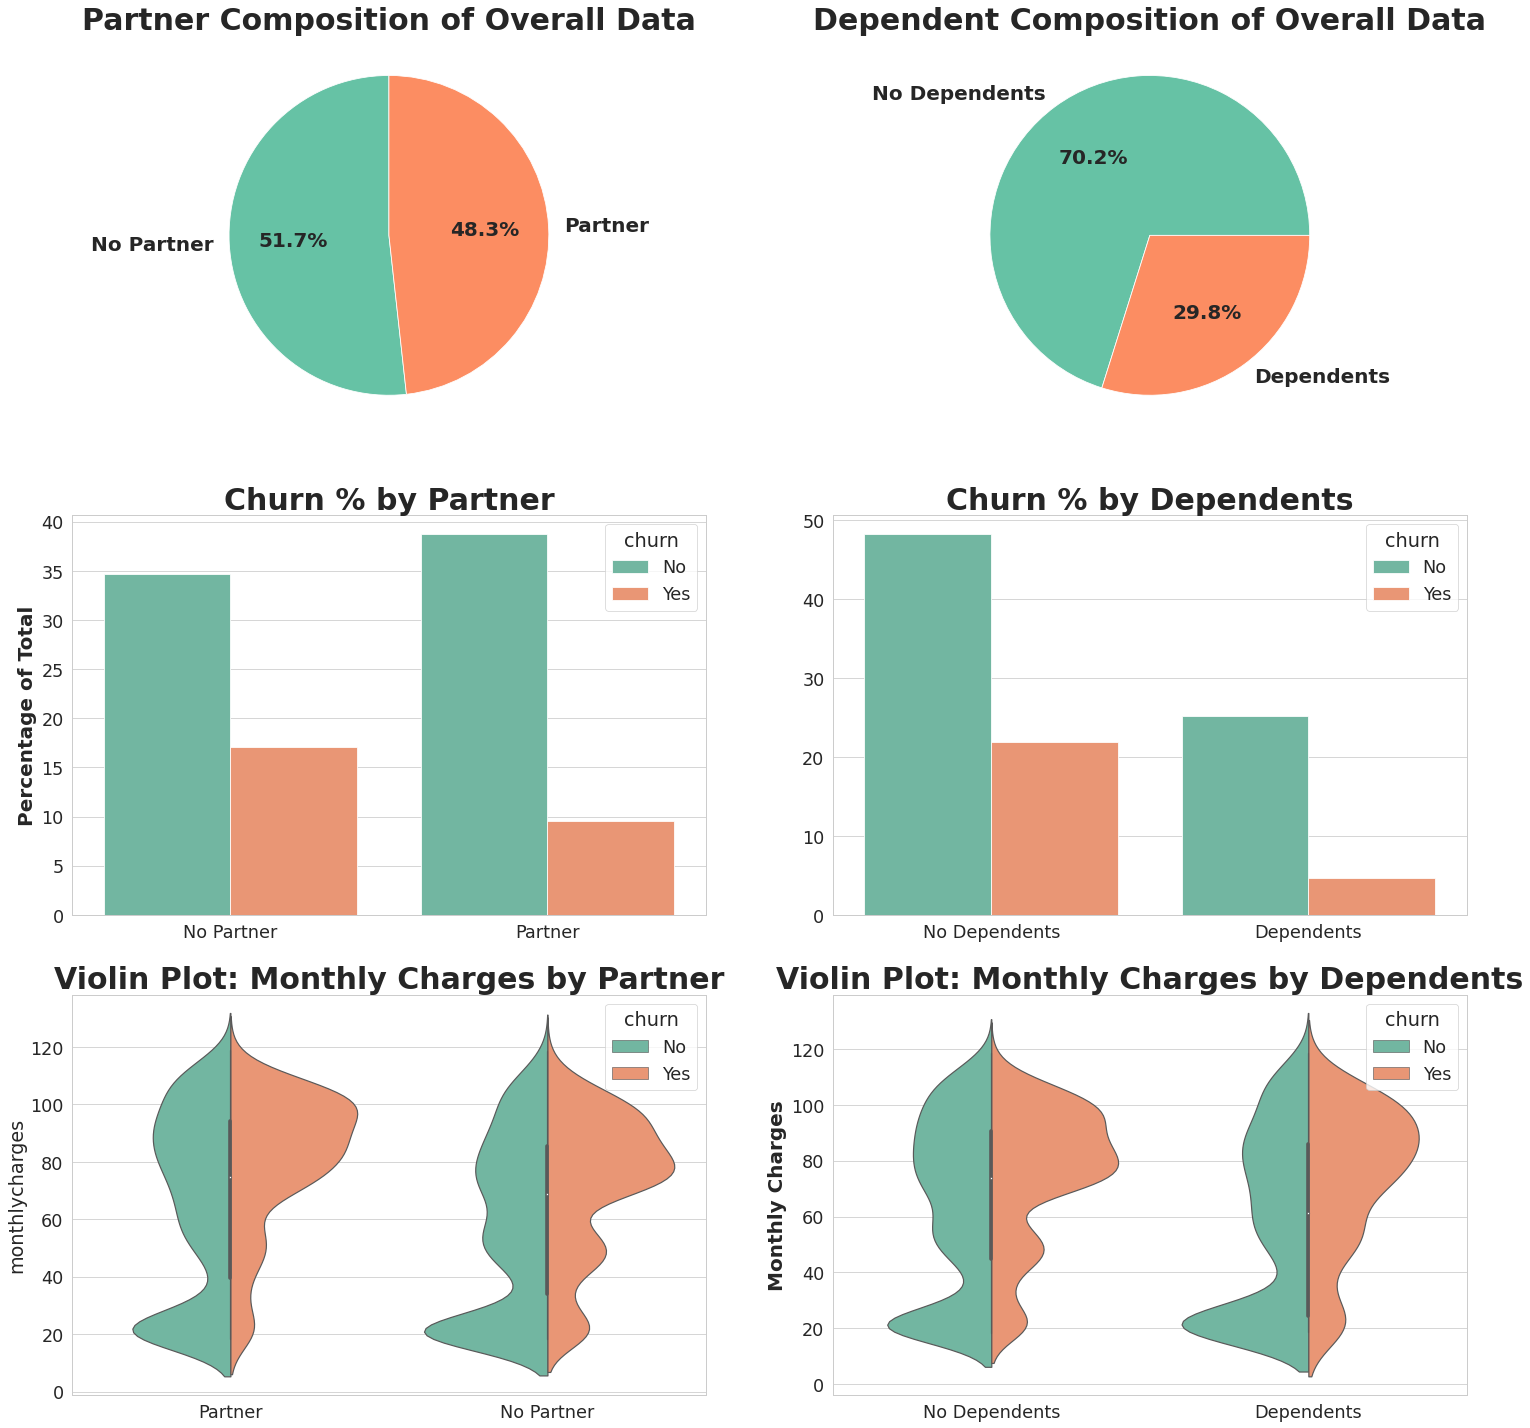

In [30]:
plot_partner_dependents(df)

**Partner/Dependent Conclusions:**

* Overall, those without partners are more likely to churn than those with partners
* Customers without dependents are more likely to churn than those with dependents

**Phone Services & Line Quantities**

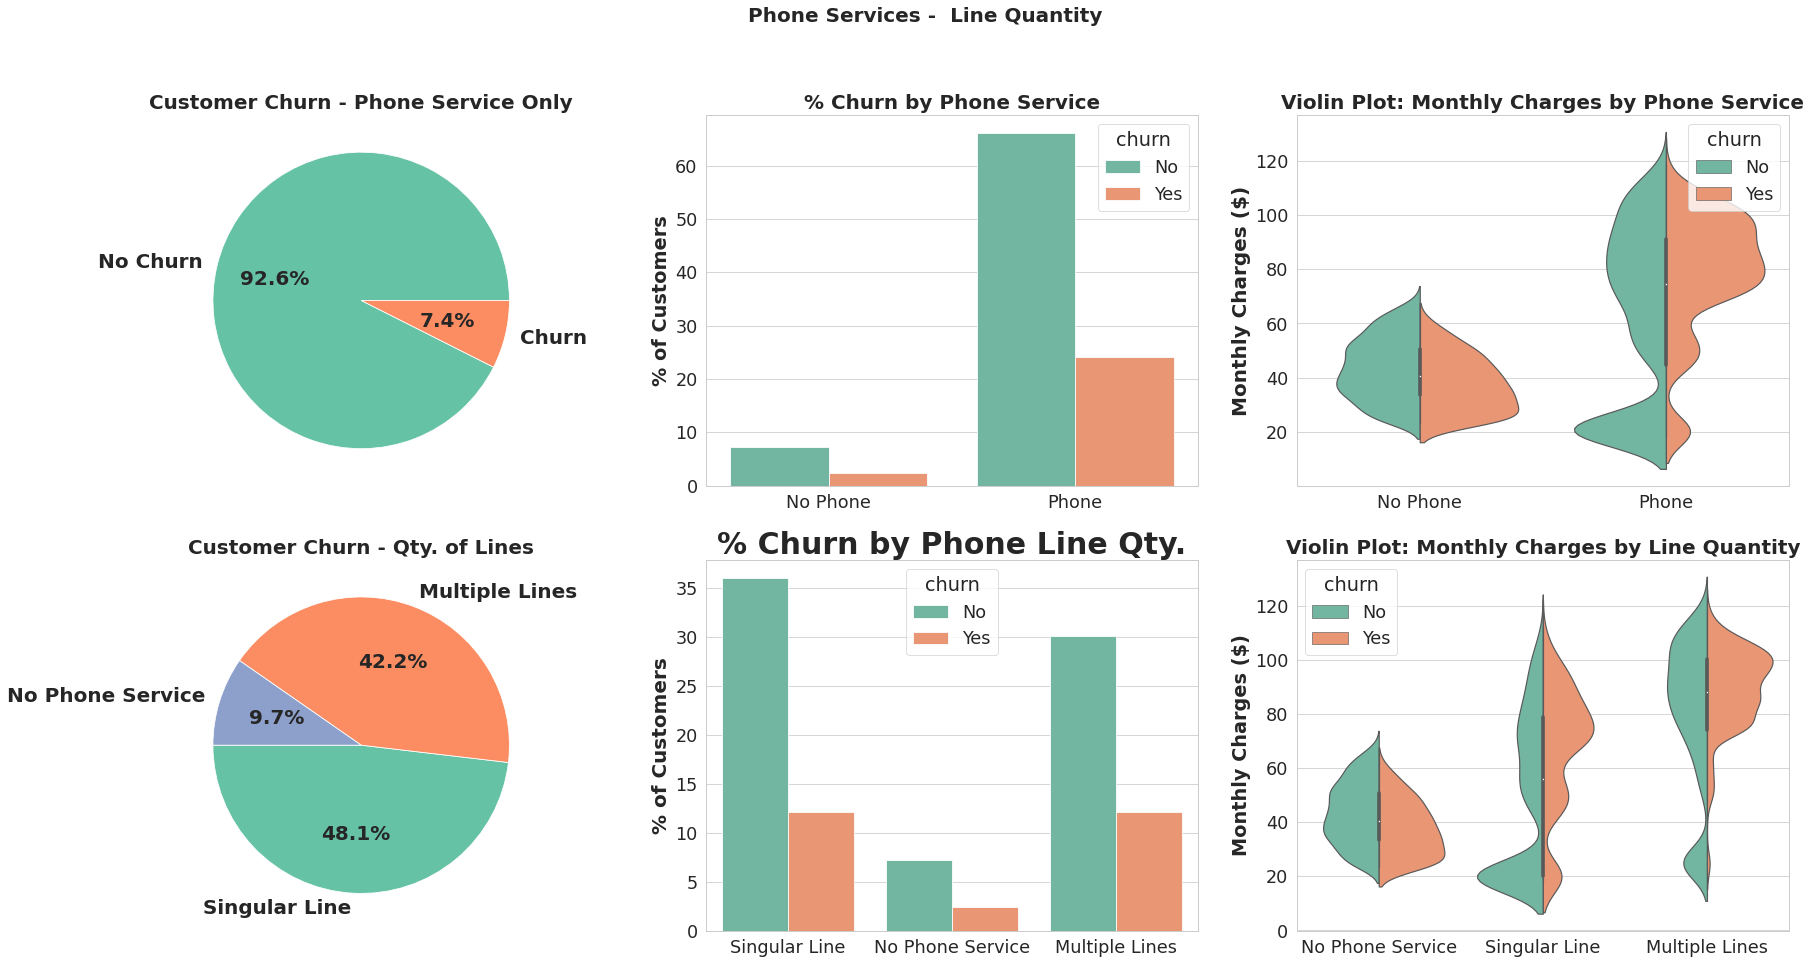

In [31]:
plot_services(df)

**Phone Service Conclusions:**

* Customers with only phone service are unlike to churn
* Customers with phone services only pay a higher average monthly charge
* Customers with multiple lines churn at approximately the same rate as those with a singular line




**Add-On Services**

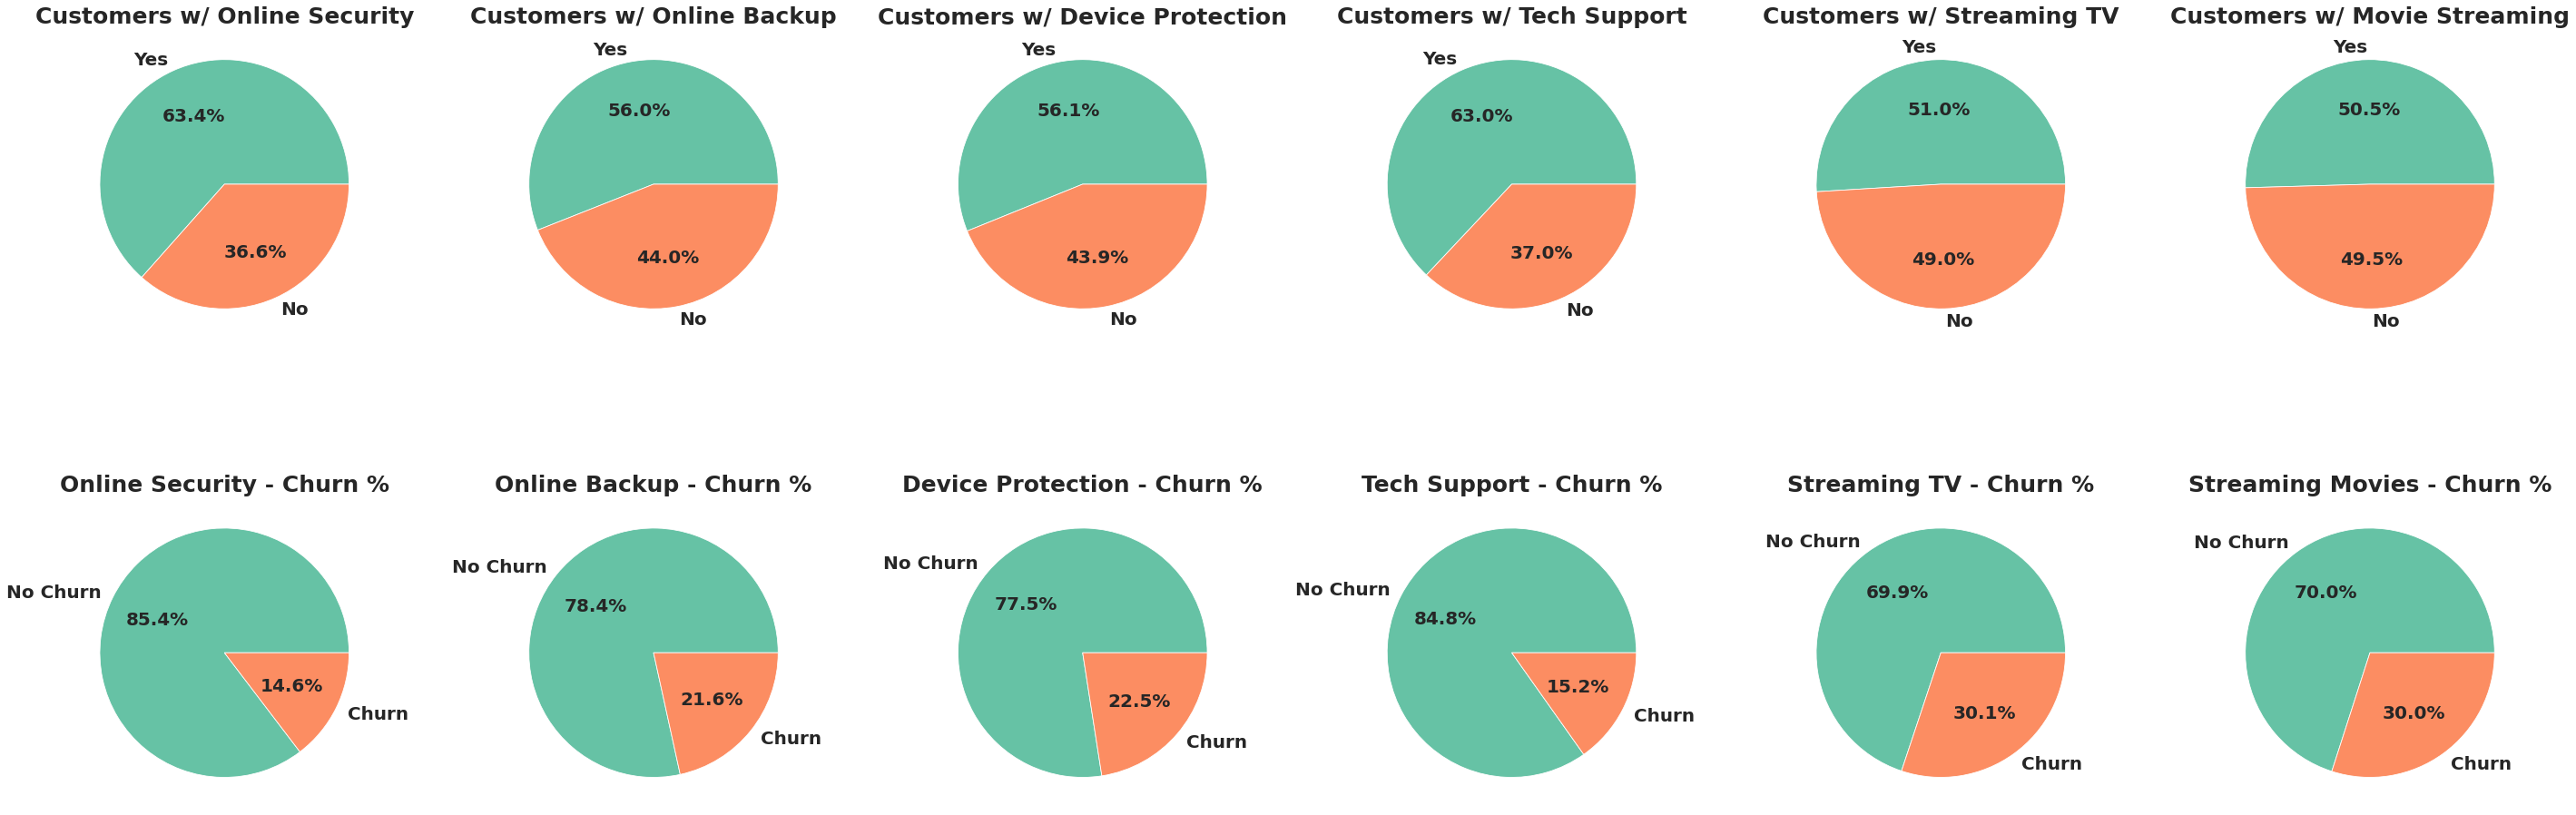

In [32]:
plot_add_on_services(df)

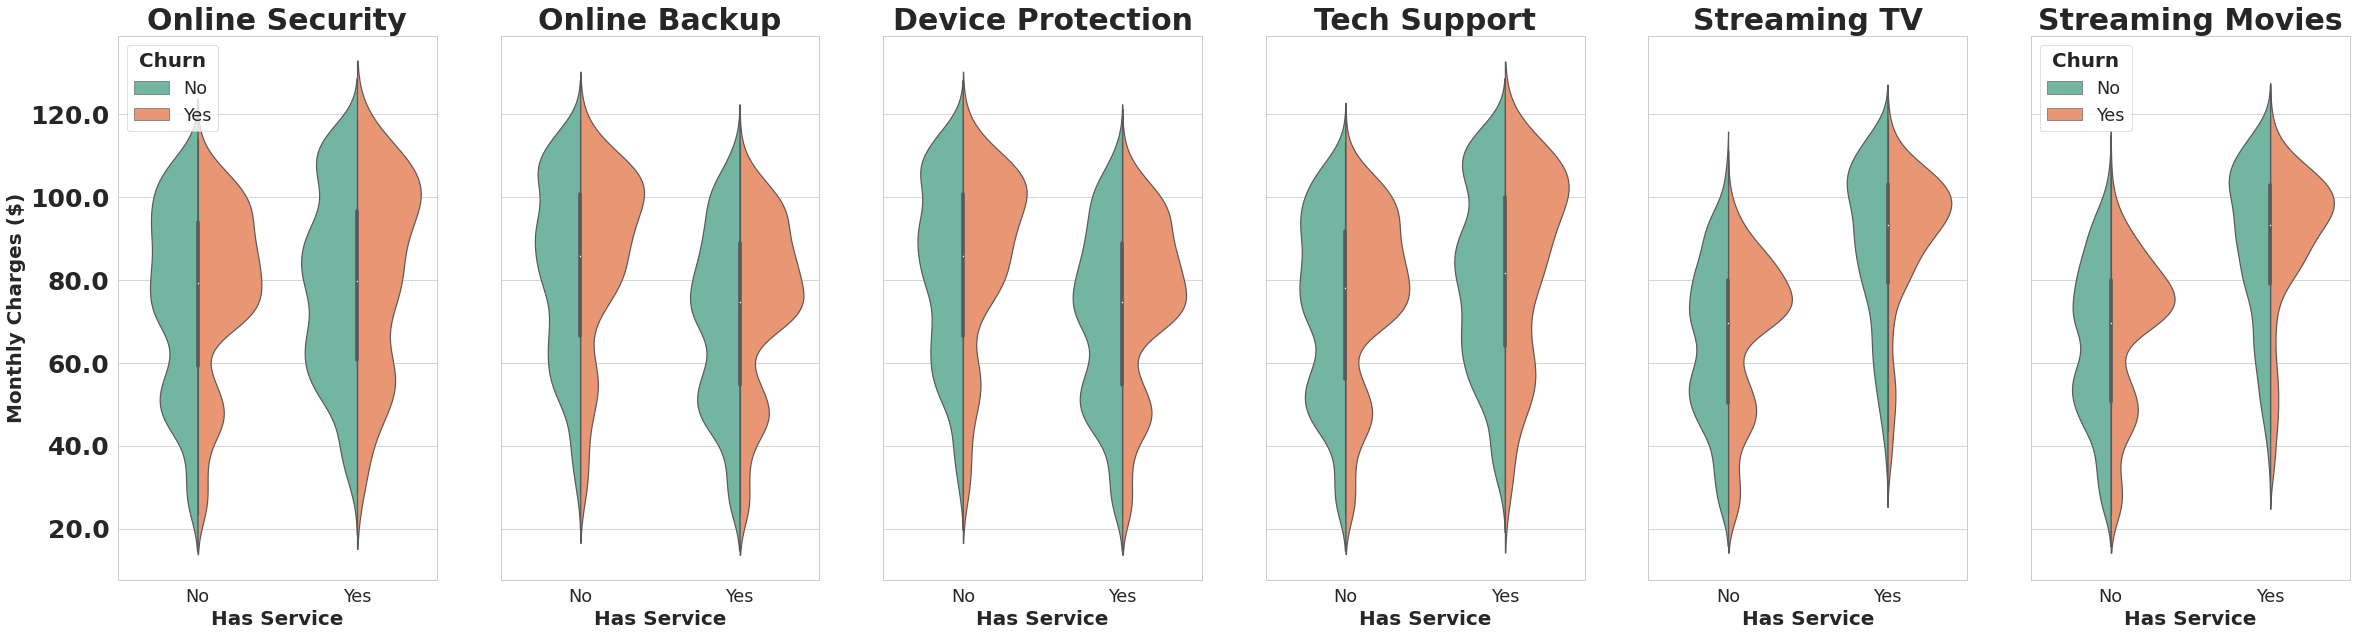

In [33]:
plot_service_charges(df)

**Add-On Service Conclusions:**

* Customers with TV Streaming and/or Movie streaming services churn more than all other services.
* Churn for customers in most categories peaks around a monthly charge of $100

**Contracts**

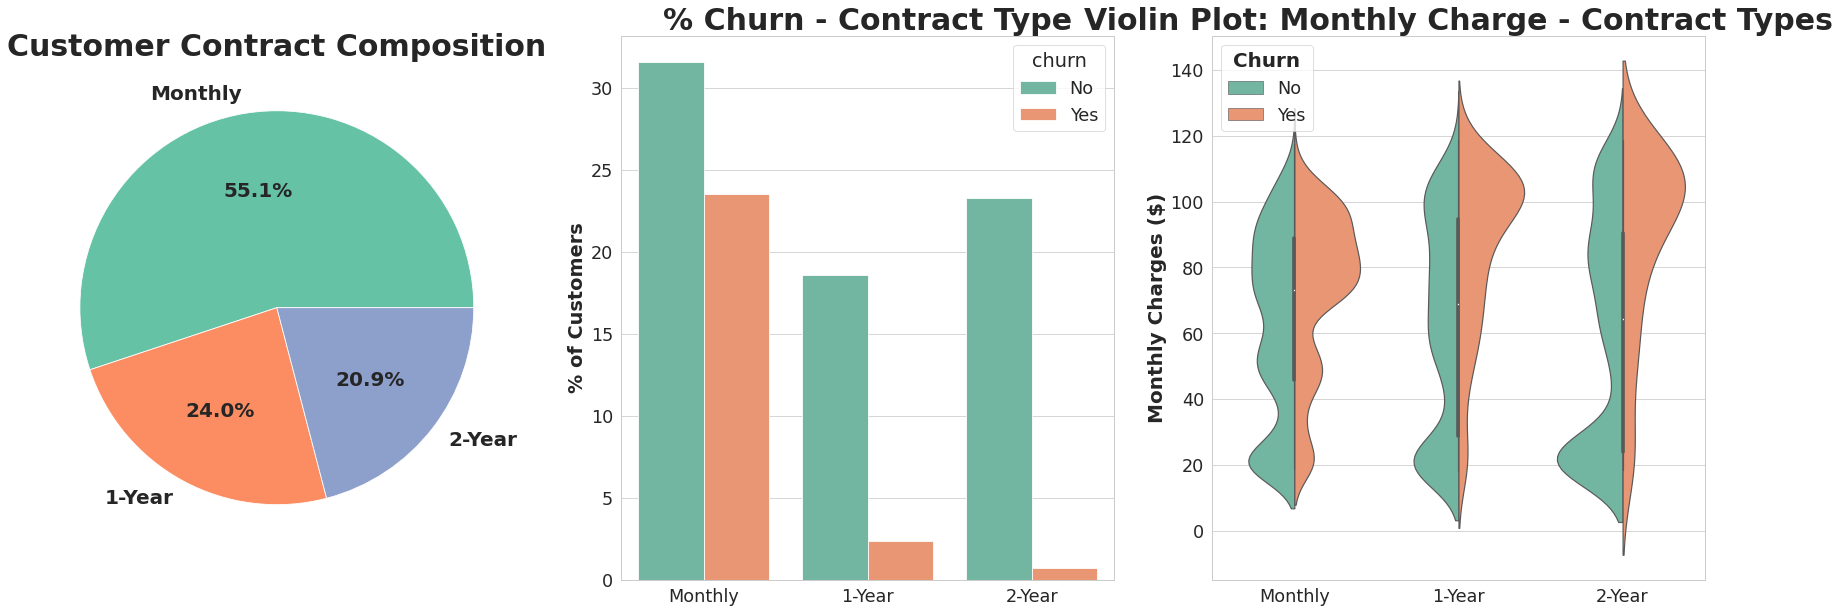

In [34]:
plot_contracts(df)

**Contract Conclusion:**

* 55% of customers use monthly payment option
* Monthly customers are more likely to churn

**Paperless Billing & Payment Methods**

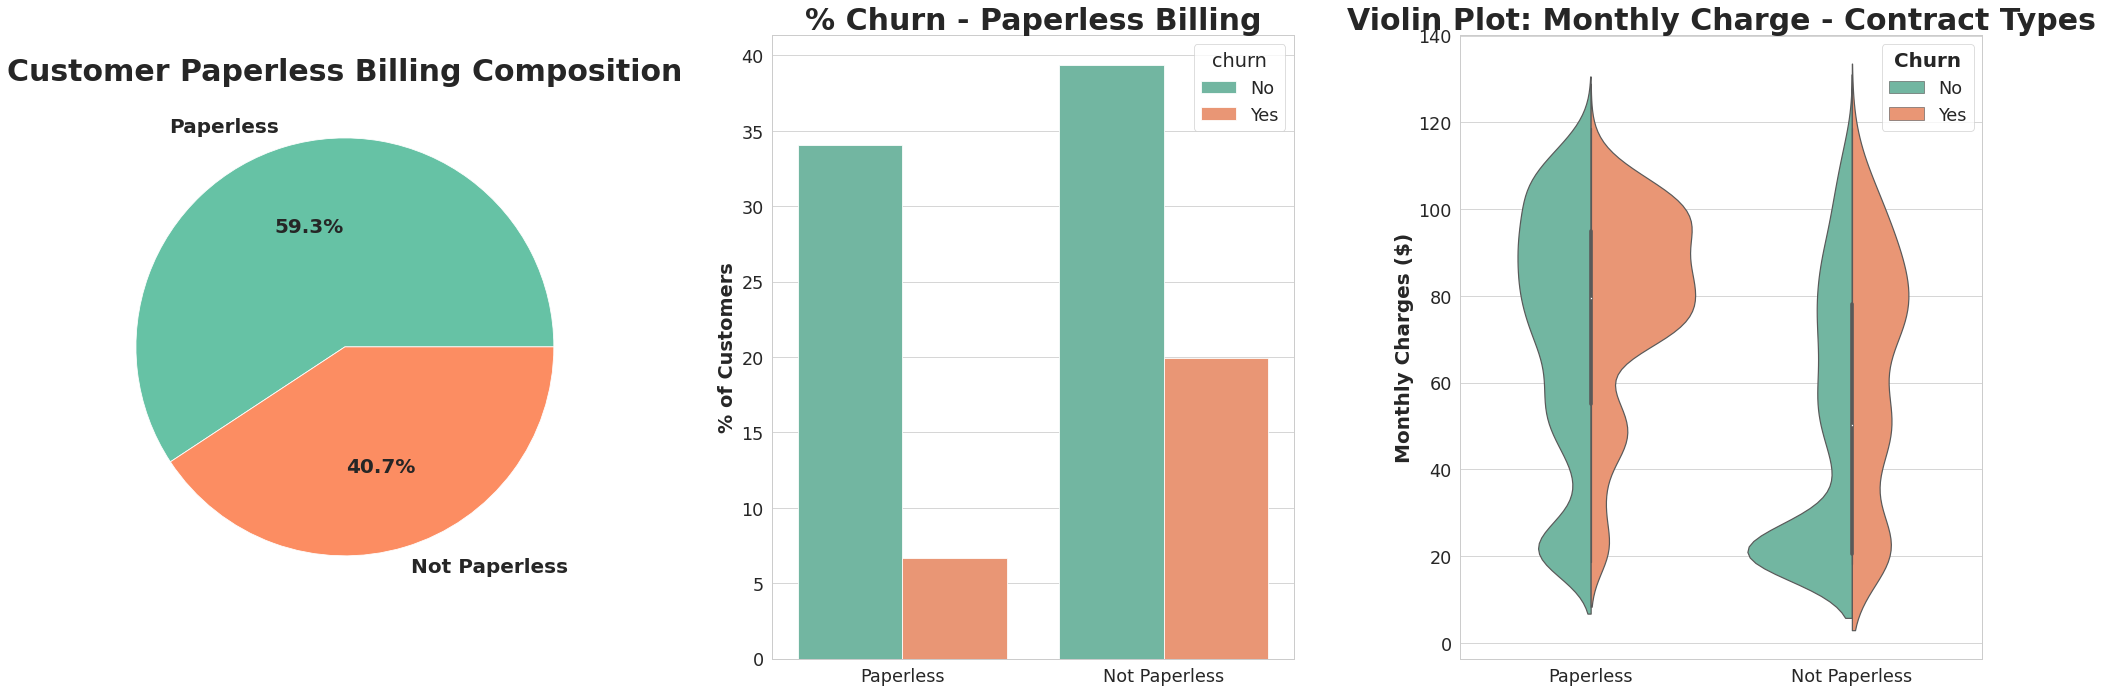

In [35]:
plot_paperless(df)

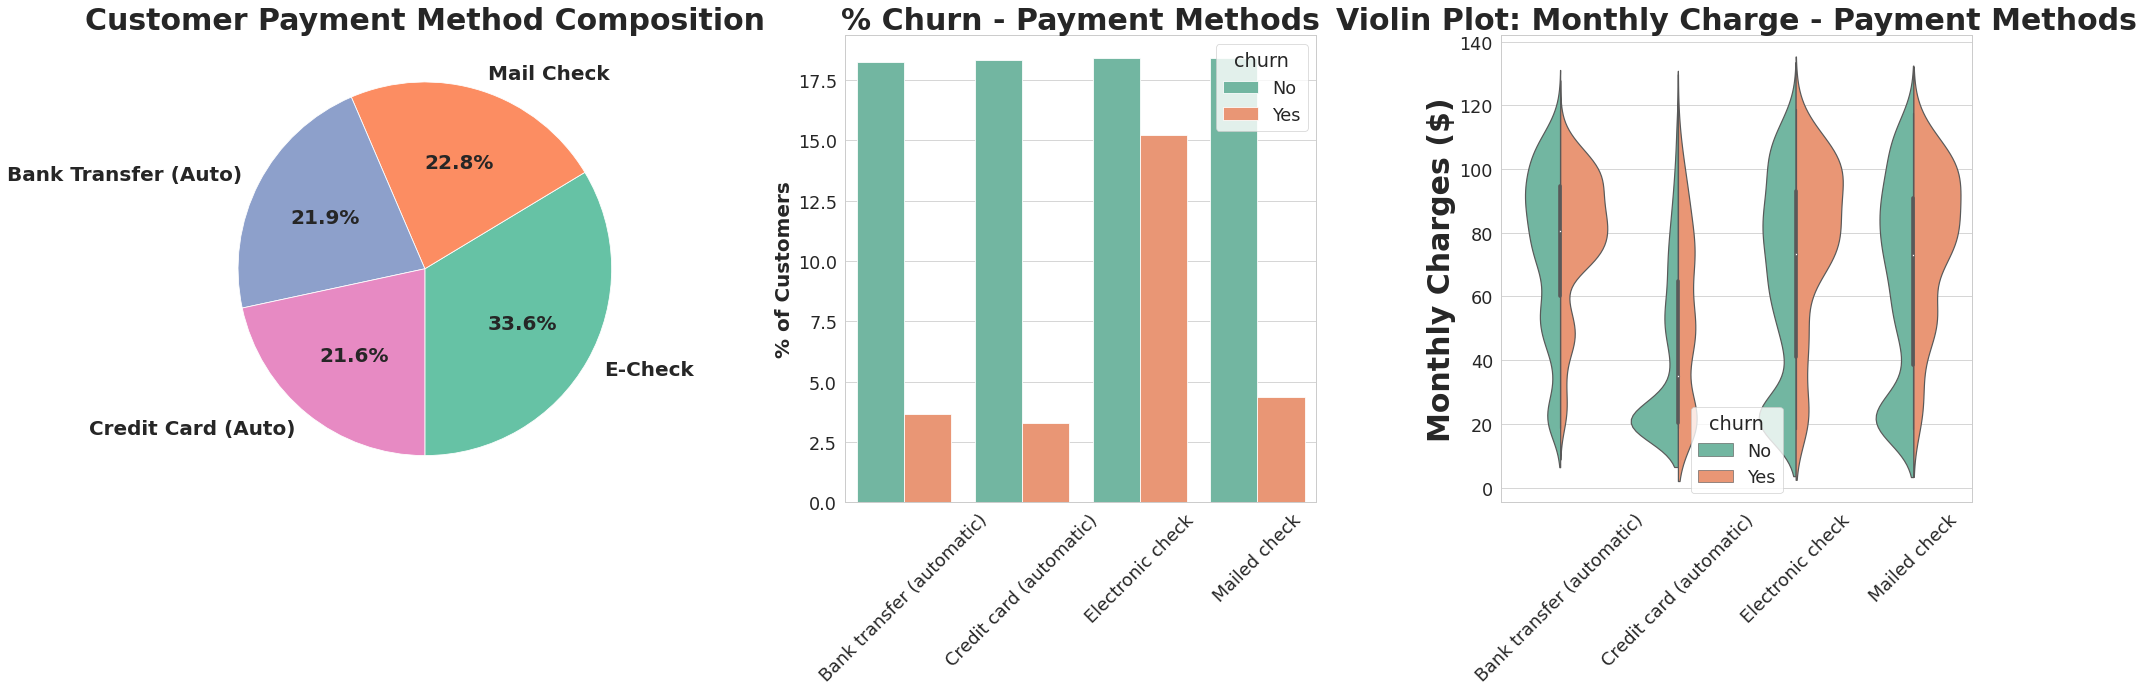

In [36]:
plot_pay_methods(df)

**Payments Conclusions:**
* Most customers have paperless billing
* Paperless billing customers churn more than no paperless
* Paperless customers pay more monthly charges

* Customers who pay with e-check churn more than 10% than customers with all other payment methods




# Feature Engineering

In [37]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [38]:
print_unique_col_values(df)

gender: ['Female' 'Male']
partner: ['Yes' 'No']
dependents: ['No' 'Yes']
phoneservice: ['No' 'Yes']
multiplelines: ['No phone service' 'No' 'Yes']
internetservice: ['DSL' 'Fiber optic' 'No']
onlinesecurity: ['No' 'Yes' 'No internet service']
onlinebackup: ['Yes' 'No' 'No internet service']
deviceprotection: ['No' 'Yes' 'No internet service']
techsupport: ['No' 'Yes' 'No internet service']
streamingtv: ['No' 'Yes' 'No internet service']
streamingmovies: ['No' 'Yes' 'No internet service']
contract: ['Month-to-month' 'One year' 'Two year']
paperlessbilling: ['Yes' 'No']
paymentmethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
churn: ['No' 'Yes']
grouped_tenure: ['less_than_1' 'less_than_3' 'less_than_4' 'less_than_2' 'greater_than_5'
 'less_than_5']


Some of the columns have no internet service or no phone service, that can be replaced with a simple No 

In [39]:

df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [40]:
print_unique_col_values(df)

gender: ['Female' 'Male']
partner: ['Yes' 'No']
dependents: ['No' 'Yes']
phoneservice: ['No' 'Yes']
multiplelines: ['No' 'Yes']
internetservice: ['DSL' 'Fiber optic' 'No']
onlinesecurity: ['No' 'Yes']
onlinebackup: ['Yes' 'No']
deviceprotection: ['No' 'Yes']
techsupport: ['No' 'Yes']
streamingtv: ['No' 'Yes']
streamingmovies: ['No' 'Yes']
contract: ['Month-to-month' 'One year' 'Two year']
paperlessbilling: ['Yes' 'No']
paymentmethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
churn: ['No' 'Yes']
grouped_tenure: ['less_than_1' 'less_than_3' 'less_than_4' 'less_than_2' 'greater_than_5'
 'less_than_5']


Convert Yes and No to 1 or 0

In [41]:

yes_no_columns = ['partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'paperlessbilling',
 'churn']

for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)

In [42]:
for col in df:
    print(f'{col}: {df[col].unique()}') 

gender: ['Female' 'Male']
seniorcitizen: [0 1]
partner: [1 0]
dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
phoneservice: [0 1]
multiplelines: [0 1]
internetservice: ['DSL' 'Fiber optic' 'No']
onlinesecurity: [0 1]
onlinebackup: [1 0]
deviceprotection: [0 1]
techsupport: [0 1]
streamingtv: [0 1]
streamingmovies: [0 1]
contract: ['Month-to-month' 'One year' 'Two year']
paperlessbilling: [1 0]
paymentmethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
monthlycharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
totalcharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
churn: [0 1]
grouped_tenure: ['less_than_1' 'less_than_3' 'less_than_4' 'less_than_2' 'greater_than_5'
 'less_than_5']


Convert Female and Male to 1 and 0

In [44]:
df['gender'].replace({'Female':1,'Male':0},inplace=True)

In [49]:
df.gender.unique()

array([1, 0])

One hot encoding for categorical columns

In [50]:
df = pd.get_dummies(data=df, columns=['internetservice','contract','paymentmethod'])
df.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'paperlessbilling', 'monthlycharges', 'totalcharges', 'churn',
       'grouped_tenure', 'internetservice_DSL', 'internetservice_Fiber optic',
       'internetservice_No', 'contract_Month-to-month', 'contract_One year',
       'contract_Two year', 'paymentmethod_Bank transfer (automatic)',
       'paymentmethod_Credit card (automatic)',
       'paymentmethod_Electronic check', 'paymentmethod_Mailed check'],
      dtype='object')

In [51]:
df.dtypes

gender                                       int64
seniorcitizen                                int64
partner                                      int64
dependents                                   int64
tenure                                       int64
phoneservice                                 int64
multiplelines                                int64
onlinesecurity                               int64
onlinebackup                                 int64
deviceprotection                             int64
techsupport                                  int64
streamingtv                                  int64
streamingmovies                              int64
paperlessbilling                             int64
monthlycharges                             float64
totalcharges                               float64
churn                                        int64
grouped_tenure                              object
internetservice_DSL                          uint8
internetservice_Fiber optic    

In [52]:
cols_to_scale = ['tenure','monthlycharges','totalcharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [53]:
for col in df:
    print(f'{col}: {df[col].unique()}')

gender: [1 0]
seniorcitizen: [0 1]
partner: [1 0]
dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
phoneservice: [0 1]
multiplelines: [0 1]
onlinesecurity: [0 1]
onlinebackup: [1 0]
deviceprotection: [0 1]
techsupport: [

Drop column grouped_tenure because it's not necessary anymore

In [59]:
df.drop('grouped_tenure', axis='columns', inplace=True)

In [60]:
for col in df:
    print(f'{col}: {df[col].unique()}')

gender: [1 0]
seniorcitizen: [0 1]
partner: [1 0]
dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
phoneservice: [0 1]
multiplelines: [0 1]
onlinesecurity: [0 1]
onlinebackup: [1 0]
deviceprotection: [0 1]
techsupport: [

# Train test split

In [61]:
X = df.drop('churn',axis='columns')
y = df['churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=5)

In [62]:
X_train.shape

(4922, 26)

In [63]:
X_test.shape

(2110, 26)

# Build a model (ANN) in tensorflow/keras

In [132]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
        keras.layers.Dense(26, input_shape=(26,), activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')                 
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
154/154 [==============================] - 2s 4ms/step - loss: 0.5622 - accuracy: 0.7052
Epoch 2/100
154/154 [==============================] - 1s 4ms/step - loss: 0.4337 - accuracy: 0.7901
Epoch 3/100
154/154 [==============================] - 1s 4ms/step - loss: 0.4214 - accuracy: 0.7966
Epoch 4/100
154/154 [==============================] - 0s 3ms/step - loss: 0.4161 - accuracy: 0.7993
Epoch 5/100
154/154 [==============================] - 1s 4ms/step - loss: 0.4127 - accuracy: 0.8039
Epoch 6/100
154/154 [==============================] - 1s 3ms/step - loss: 0.4100 - accuracy: 0.8076
Epoch 7/100
154/154 [==============================] - 0s 3ms/step - loss: 0.4084 - accuracy: 0.8058
Epoch 8/100
154/154 [==============================] - 0s 3ms/step - loss: 0.4059 - accuracy: 0.8117
Epoch 9/100
154/154 [==============================] - 1s 4ms/step - loss: 0.4046 - accuracy: 0.8141
Epoch 10/100
154/154 [==============================] - 1s 4ms/step - loss: 0.4027 - accura

In [133]:
model.evaluate(X_test, y_test)

66/66 [==============================] - 1s 3ms/step - loss: 0.4822 - accuracy: 0.7654


[0.48218417167663574, 0.7654028534889221]

In [134]:
model.layers

In [135]:
yp = model.predict(X_test)
yp[:5]

array([[0.43072313],
       [0.47189373],
       [0.00669423],
       [0.7531655 ],
       [0.79570603]], dtype=float32)

In [136]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [137]:
y_pred[:10]

[0, 0, 0, 1, 1, 1, 0, 1, 0, 0]

In [138]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: churn, dtype: int64

In [139]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1511
           1       0.61      0.50      0.55       599

    accuracy                           0.77      2110
   macro avg       0.71      0.69      0.69      2110
weighted avg       0.75      0.77      0.76      2110



Text(59.7, 0.5, 'Truth')

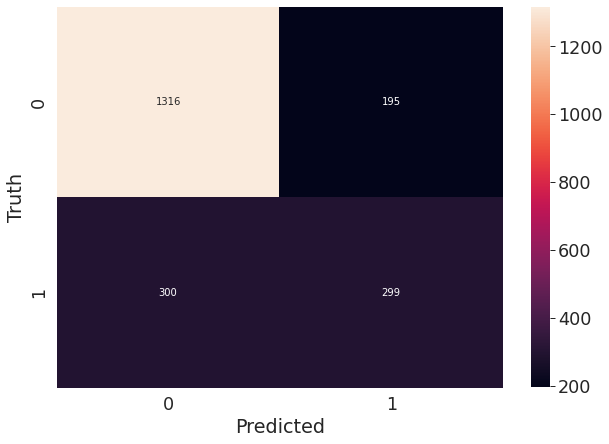

In [140]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

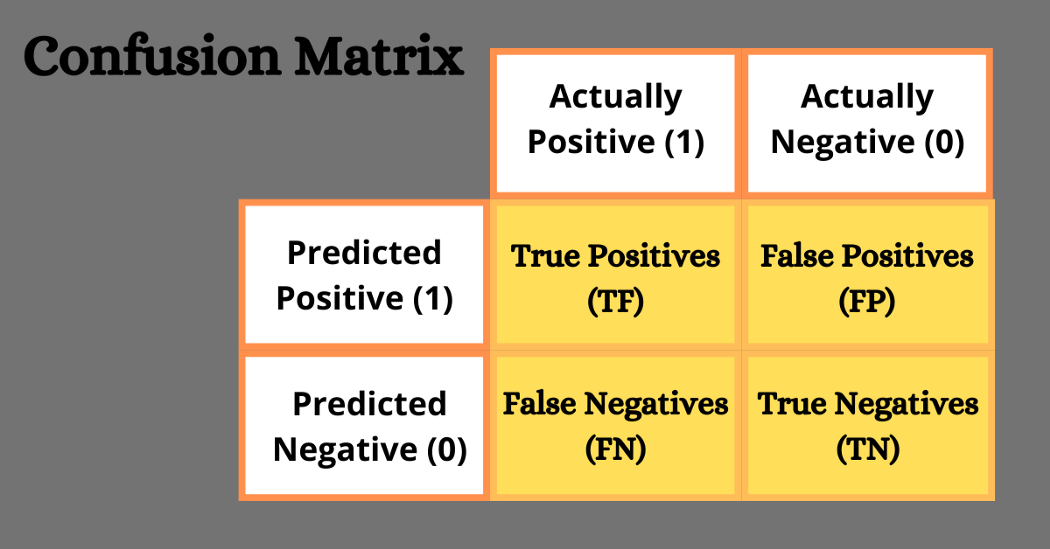

* The cell in the top left corner contains **True Positives (TP)**. These are clients who don't churn and were correctly identified by the algorithm.
* The cell in the bottom right corner contains **True Negatives (TN)**. These are clients who  churn and were correctly identified by the algorithm.
* The cell in the Bottom left corner contains **False Negatives (FN)**. False Negatives is when a client doesn't churn but the algorithm predicted that he did.
* The cell in the top right corner contains **False Positives (FP)**. False Positives is when when a client churned but the algorithm predicted that he didn't.
* **False Positives are known as Type I error** (rejection of a true null hypothesis)
* **False Negatives are known as Type II erro**r (non — rejection of a false null hypothesis)

See how some metrics is calculated:

**Accuracy**

Accuracy is defined as the closeness of a measured value to a true value. That means the closer the measured value to the true value, the better is the accuracy.

Accuracy answers the question, what percent of the model’s predictions were correct? Accuracy looks at True Positives and True Negatives.
Accuracy should be used as a performance metric only if we have a balanced dataset.

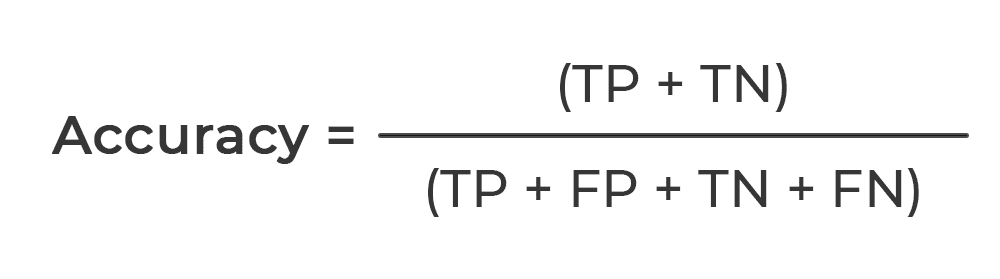

In [142]:
round((1316+299)/ (1316+299+195+300),2)

0.77

**Precision**

Precision refers to the closeness of two or more measurements to each other.

Precision answers the question, out of the number of times a model predicted positive, how often was it correct?

Precision should be used as a performance metric when the importance of False Positive is very high and the importance of false negative is very low.
For example, we take a use case of email spam detection.
In email spam detection, a false positive means that a non-spam email (Actual negative) has been identified as spam (False positive).
The user might miss upon important emails if precision is not high for spam detection models.

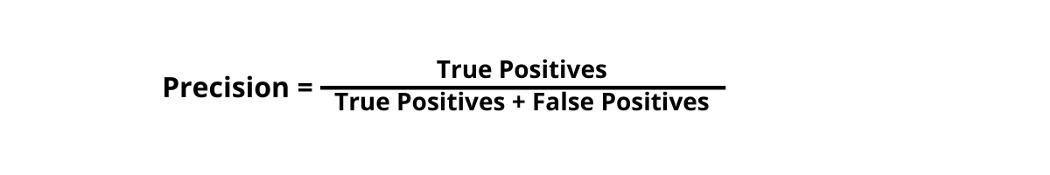

Precision for 0 class. i.e. Precision for customers who did not churn



In [143]:
round(1316/(1316+300),2)

0.81

Precision for 1 class. i.e. Precision for customers who actually churned

In [144]:
round(299/(299+195),2)

0.61

**Recall**

Recall answers the question, out of the total actual positive values, how many of them were correctly predicted as positive?

The Recall should be used as a performance metric when the importance of false negative is high and the importance of false positive is low.
For example, we take the use case of cancer detection in patients.
If a patient having cancer (Actual Positive) is predicted as not having cancer (Predicted Negative), it could be extremely fatal for the patient.

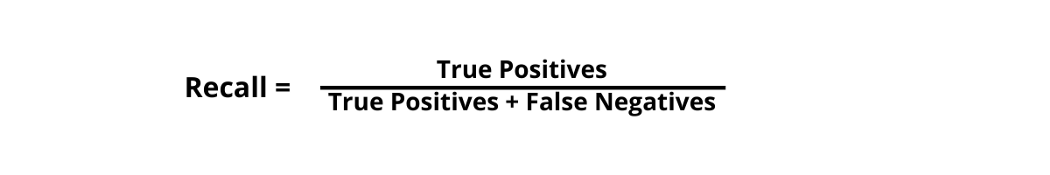

Recall for 0 class

In [145]:
round(1316/(1316+195),2)

0.87

Recall for 1 class

In [146]:
round(299/(299+300),2)

0.5

**F1 score**

In some of the problem statements, false positive and false negative both are very important. We have to create a balance between the false positive and false negative. In such cases, we make use of another performance metric known as an F1 score.

F1 score is the harmonic mean of Precision and Recall.

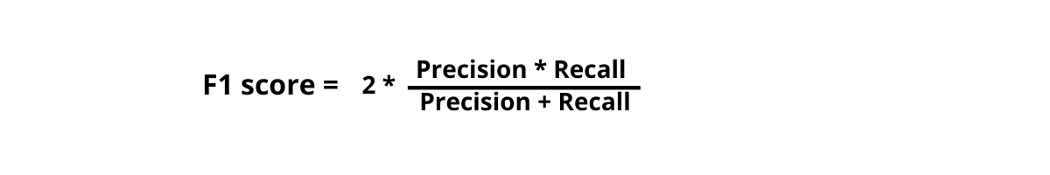

F1 score should be used as a performance metric if the number of samples in the positive class is very less and if the cost of false-positive and the cost of false negative both are very high.

In fraud detection problem, the number of fraud transactions (positives) is very less as compared to the number of genuine transactions (negatives). Hence F1 score should be used as a performance metric to evaluate the model in such cases.

F1 for 0 class

In [147]:
round(2*((0.81*0.87)/(0.81+0.87)), 2)

0.84

F1 for 1 class

In [148]:
round(2*((0.61*0.50)/(0.61+0.50)), 2)

0.55

# Conclusion

Since  the importance of False Positive is very high and the importance of false negative is very low in our model, we must see the precision metric. So, our performace is not bad, because he can predict 61% of the clients who actually churned.  

#References

https://github.com/andrewcole33/telco_churn_analysis/blob/master/EDA.ipynb

https://github.com/andrewcole33/telco_churn_analysis/blob/master/eda_module.py

https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/11_chrun_prediction/churn.ipynb

https://ai.plainenglish.io/what-is-accuracy-precision-recall-and-f1-score-what-is-its-significance-in-machine-learning-77d262952287